In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .**

In [2]:
#imports

import tensorflow as tf 
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pyplot

In [3]:
#Reading data

df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis github/Sentiment-Analysis/sentimentanalysisdata.csv', encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
#Preprocessing data by removing urls and usernames from the tweets

In [6]:
def removeusername(x):
    arr=x.split()
    if arr[0].startswith('@'):
        arr.pop(0)
    return ' '.join(arr)

In [7]:
def removeurl(x):
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x, flags=re.MULTILINE)
    return text

In [8]:
def createbinary(x):
    if x==4:
        return 1
    else:
        return 0

In [9]:
df['text']=df['text'].apply(removeusername)

In [10]:
df['text']=df['text'].apply(removeurl)

In [11]:
df['target']=df['target'].apply(createbinary)

In [12]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to sa...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am ..."


In [13]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1551958
dtype: int64

In [14]:
#Splitting data into training and testing

In [15]:
df.target.unique()

array([0, 1])

In [16]:
x=df['text']
y=df['target']

In [17]:
x.head()

0     - Awww, that's a bummer. You shoulda got Davi...
1    is upset that he can't update his Facebook by ...
2    I dived many times for the ball. Managed to sa...
3       my whole body feels itchy and like its on fire
4    no, it's not behaving at all. i'm mad. why am ...
Name: text, dtype: object

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.2)

In [20]:
train_tweets, test_tweets, train_label, test_label=[], [], [], []
for i in x_train:
    train_tweets.append(str(i))
for i in x_test:
    test_tweets.append(str(i))
for i in y_train:
    train_label.append(i)
for i in y_test:
    test_label.append(i)

In [21]:
del x, y, x_train, y_train, x_test, y_test

In [22]:
#Declaring some default values

vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [23]:
#Training the tokenizer on our dataset

tokenizer=keras.preprocessing.text.Tokenizer(oov_token=oov_tok, num_words=4000)
tokenizer.fit_on_texts(train_tweets)
word_index=tokenizer.word_index

In [24]:
print(list(word_index)[:10])

['<OOV>', 'i', 'to', 'the', 'a', 'my', 'and', 'you', 'is', 'it']


In [25]:
#Converting the tweets to neumeric data as tensors

sequences=tokenizer.texts_to_sequences(train_tweets)
sequences

[[15,
  9,
  1090,
  1,
  9,
  25,
  61,
  1,
  2,
  240,
  2,
  269,
  328,
  10,
  5,
  264,
  2,
  66,
  84,
  74,
  358,
  2269],
 [81, 12, 1],
 [2, 176, 431, 4, 1, 534],
 [512, 125, 1, 1432, 107],
 [2, 176, 38, 2011, 6, 3020, 1694, 94, 17, 5, 676, 1300],
 [185, 140, 33, 87, 1603, 12, 8, 28, 18, 821, 383, 1],
 [2186, 573, 2186, 1276, 627, 31, 8, 2795, 1, 359, 11, 44, 1],
 [19,
  9,
  568,
  3,
  33,
  1878,
  2417,
  125,
  4,
  1877,
  18,
  101,
  98,
  46,
  88,
  12,
  24,
  351,
  690,
  219],
 [1463, 277, 687, 7, 218, 30, 131, 25, 5, 1091, 684, 3, 203],
 [209, 12, 141, 456, 1, 3, 57, 18, 6, 962, 9, 230, 889, 14, 203, 1],
 [310, 1, 21, 1, 125, 3, 178, 310],
 [186, 9],
 [9, 80, 889, 12, 106, 589, 50, 13, 4, 31],
 [1,
  95,
  1912,
  73,
  24,
  637,
  1,
  11,
  1,
  54,
  5,
  665,
  129,
  3,
  376,
  4,
  31,
  45,
  24,
  2381,
  99,
  131],
 [9,
  10,
  410,
  3,
  108,
  1,
  24,
  45,
  212,
  85,
  9,
  37,
  525,
  7,
  1553,
  193,
  1381,
  3748,
  49],
 [37, 732, 14

In [26]:
#Adding padding to equal the size of tensors

padded=keras.preprocessing.sequence.pad_sequences(sequences, maxlen=120, truncating='post')

In [27]:
print(padded)

[[   0    0    0 ...   74  358 2269]
 [   0    0    0 ...   81   12    1]
 [   0    0    0 ...    4    1  534]
 ...
 [   0    0    0 ...    6  216   51]
 [   0    0    0 ...  209  156  222]
 [   0    0    0 ...    9   60  359]]


In [28]:
#Preprocessing testing data

In [29]:
test_sequence=tokenizer.texts_to_sequences(test_tweets)
test_padded=keras.preprocessing.sequence.pad_sequences(test_sequence, maxlen=120, truncating='post')

In [30]:
#Creating the model

model=keras.models.Sequential([
    keras.layers.Embedding(40000, 16, input_length=120),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643,201
Trainable params: 643,201
Non-trainable params: 0
__________________________________________________

In [33]:
train_label=np.array(train_label)
test_label=np.array(test_label)

In [34]:
train_label[:50]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0])

In [35]:
#Training the model

In [36]:
history=model.fit(padded, train_label, validation_split=0.2, epochs=10)

Epoch 1/10
32000/32000 [==============================] - 184s 6ms/step - loss: 0.4616 - accuracy: 0.7809 - val_loss: 0.4545 - val_accuracy: 0.7844
Epoch 2/10
32000/32000 [==============================] - 178s 6ms/step - loss: 0.4423 - accuracy: 0.7917 - val_loss: 0.4414 - val_accuracy: 0.7929
Epoch 3/10
32000/32000 [==============================] - 206s 6ms/step - loss: 0.4366 - accuracy: 0.7952 - val_loss: 0.4364 - val_accuracy: 0.7958
Epoch 4/10
32000/32000 [==============================] - 222s 7ms/step - loss: 0.4323 - accuracy: 0.7982 - val_loss: 0.4429 - val_accuracy: 0.7907
Epoch 5/10
32000/32000 [==============================] - 186s 6ms/step - loss: 0.4296 - accuracy: 0.7996 - val_loss: 0.4352 - val_accuracy: 0.7978
Epoch 6/10
32000/32000 [==============================] - 178s 6ms/step - loss: 0.4268 - accuracy: 0.8014 - val_loss: 0.4321 - val_accuracy: 0.8003
Epoch 7/10
32000/32000 [==============================] - 178s 6ms/step - loss: 0.4241 - accuracy: 0.8028 - val_

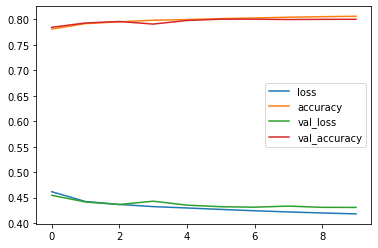

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
model.save('/content/drive/MyDrive/Sentiment Analysis github/Sentiment-Analysis/sentiment_analysis.h5')

In [39]:
model.evaluate(test_padded, test_label)

10000/10000 [==============================] - 24s 2ms/step - loss: 0.4312 - accuracy: 0.7993


[0.43123090267181396, 0.7992874979972839]

Done